In [17]:
#importing libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [18]:
#taking the dataset into pandas dataframe
df = pd.read_csv('weatherAUS.csv')
# print(df.head())


In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

year_counts = df['Year'].value_counts().sort_index()

print("Number of rows for each year:")
print(year_counts)


Number of rows for each year:
Year
2007       61
2008     2270
2009    16789
2010    16782
2011    15407
2012    15409
2013    16415
2014    17885
2015    17885
2016    17934
2017     8623
Name: count, dtype: int64


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2017)]


print(f"Rows from 2013 to 2017: {len(df)}")


df

Rows from 2013 to 2017: 78742


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
1431,2013-01-01,Albury,12.1,34.5,0.0,NaN,NaN,W,44.0,SE,...,16.0,1012.8,1009.3,NaN,NaN,22.3,32.7,No,No,2013
1432,2013-01-02,Albury,13.8,33.6,0.0,NaN,NaN,SSE,28.0,SSW,...,17.0,1012.2,1010.9,NaN,NaN,21.4,31.2,No,No,2013
1433,2013-01-03,Albury,15.8,36.9,0.0,NaN,NaN,E,22.0,S,...,20.0,1015.8,1011.9,NaN,NaN,23.6,33.9,No,No,2013
1434,2013-01-04,Albury,18.6,40.7,0.0,NaN,NaN,ENE,44.0,ESE,...,12.0,1012.3,1008.1,NaN,NaN,27.8,39.3,No,No,2013
1435,2013-01-05,Albury,19.8,43.4,0.0,NaN,NaN,NW,81.0,S,...,17.0,1012.4,1009.8,NaN,1.0,30.7,42.4,No,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,2017
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,2017
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,2017
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,2017


In [21]:
print("Unique values in RainTomorrow:", df['RainTomorrow'].unique())


print("\nValue counts:")
print(df['RainTomorrow'].value_counts())

Unique values in RainTomorrow: ['No' 'Yes' nan]

Value counts:
RainTomorrow
No     60086
Yes    16616
Name: count, dtype: int64


In [61]:
# #Plotting the data columns


# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns

# #Numerical
# for col in numerical_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()

# #Categorical
# for col in categorical_cols:
#     plt.figure(figsize=(6, 4))
#     sns.countplot(data=df, x=col, palette='pastel')
#     plt.title(f'Count Plot of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


In [22]:
#counting null cells in each column
print(df.isnull().sum())


print("Total empty cells:", df.isnull().sum().sum())

#calculating missing data percentage for each columm 
missing_percent = df.isnull().mean() * 100
print()

# print("Percentage of missing data in each column:\n")
#printing missing data percentage for each columm 
# print(missing_percent.sort_values(ascending=False))

Date                 0
Location             0
MinTemp            937
MaxTemp            858
Rainfall          2033
Evaporation      38959
Sunshine         44554
WindGustDir       4704
WindGustSpeed     4654
WindDir9am        5406
WindDir3pm        2575
WindSpeed9am       729
WindSpeed3pm      2000
Humidity9am       1389
Humidity3pm       3358
Pressure9am       8663
Pressure3pm       8637
Cloud9am         32701
Cloud3pm         35267
Temp9am            893
Temp3pm           2804
RainToday         2033
RainTomorrow      2040
Year                 0
dtype: int64
Total empty cells: 205194



In [ ]:
#Label encoding for multi category columns

df = df.dropna(subset=['RainTomorrow'])

df['Location'] = label_encoder.fit_transform(df['Location'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'Location':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")

df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'WindGustDir':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")

df['WindDir9am'] = label_encoder.fit_transform(df['WindDir9am'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'WindDir9am':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")

df['WindDir3pm'] = label_encoder.fit_transform(df['WindDir3pm'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'WindDir3pm':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")




#Showing the encoding mapping
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'RainToday':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")

#Showing the encoding mapping
df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label encoding mapping for 'RainTomorrow':")
for k, v in label_mapping.items():
    print(f"{k} --> {v}")



df

Label encoding mapping for 'Location':
Adelaide --> 0
Albany --> 1
Albury --> 2
AliceSprings --> 3
BadgerysCreek --> 4
Ballarat --> 5
Bendigo --> 6
Brisbane --> 7
Cairns --> 8
Canberra --> 9
Cobar --> 10
CoffsHarbour --> 11
Dartmoor --> 12
Darwin --> 13
GoldCoast --> 14
Hobart --> 15
Katherine --> 16
Launceston --> 17
Melbourne --> 18
MelbourneAirport --> 19
Mildura --> 20
Moree --> 21
MountGambier --> 22
MountGinini --> 23
Newcastle --> 24
Nhil --> 25
NorahHead --> 26
NorfolkIsland --> 27
Nuriootpa --> 28
PearceRAAF --> 29
Penrith --> 30
Perth --> 31
PerthAirport --> 32
Portland --> 33
Richmond --> 34
Sale --> 35
SalmonGums --> 36
Sydney --> 37
SydneyAirport --> 38
Townsville --> 39
Tuggeranong --> 40
Uluru --> 41
WaggaWagga --> 42
Walpole --> 43
Watsonia --> 44
Williamtown --> 45
Witchcliffe --> 46
Wollongong --> 47
Woomera --> 48
Label encoding mapping for 'WindGustDir':
E --> 0
ENE --> 1
ESE --> 2
N --> 3
NE --> 4
NNE --> 5
NNW --> 6
NW --> 7
S --> 8
SE --> 9
SSE --> 10
SSW --> 11


C:\Users\User\AppData\Local\Temp\ipykernel_7964\796838040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df['Location'])
C:\Users\User\AppData\Local\Temp\ipykernel_7964\796838040.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WindGustDir'] = label_encoder.fit_transform(df['WindGustDir'])
C:\Users\User\AppData\Local\Temp\ipykernel_7964\796838040.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
1431,2013-01-01,2,12.1,34.5,0.0,NaN,NaN,13,44.0,9,...,16.0,1012.8,1009.3,NaN,NaN,22.3,32.7,0,0,2013
1432,2013-01-02,2,13.8,33.6,0.0,NaN,NaN,10,28.0,11,...,17.0,1012.2,1010.9,NaN,NaN,21.4,31.2,0,0,2013
1433,2013-01-03,2,15.8,36.9,0.0,NaN,NaN,0,22.0,8,...,20.0,1015.8,1011.9,NaN,NaN,23.6,33.9,0,0,2013
1434,2013-01-04,2,18.6,40.7,0.0,NaN,NaN,1,44.0,2,...,12.0,1012.3,1008.1,NaN,NaN,27.8,39.3,0,0,2013
1435,2013-01-05,2,19.8,43.4,0.0,NaN,NaN,7,81.0,8,...,17.0,1012.4,1009.8,NaN,1.0,30.7,42.4,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,41,3.5,21.8,0.0,NaN,NaN,0,31.0,2,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0,0,2017
145455,2017-06-21,41,2.8,23.4,0.0,NaN,NaN,0,31.0,9,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0,0,2017
145456,2017-06-22,41,3.6,25.3,0.0,NaN,NaN,6,22.0,9,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0,0,2017
145457,2017-06-23,41,5.4,26.9,0.0,NaN,NaN,3,37.0,9,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0,0,2017


Correlation with RainTomorrow:
 Sunshine         0.440662
Humidity3pm      0.437745
Cloud3pm         0.363506
RainToday        0.303959
Cloud9am         0.301253
Humidity9am      0.254469
Pressure9am      0.242002
WindGustSpeed    0.231696
Rainfall         0.229737
Pressure3pm      0.220430
Temp3pm          0.196902
MaxTemp          0.162417
Evaporation      0.123165
WindSpeed3pm     0.087047
WindSpeed9am     0.083049
MinTemp          0.075277
WindGustDir      0.062069
WindDir3pm       0.044900
Temp9am          0.034233
WindDir9am       0.021845
Year             0.012264
Date             0.011513
Location         0.003841
Name: RainTomorrow, dtype: float64


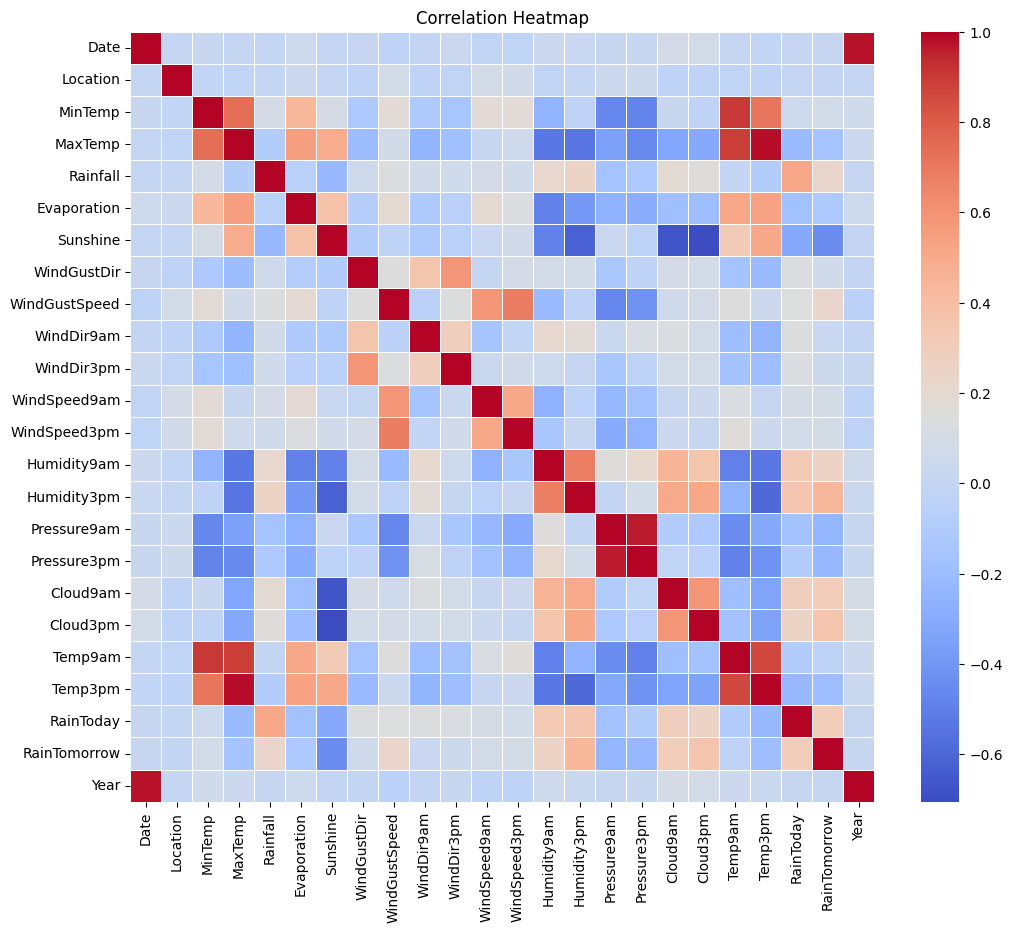

In [ ]:
#Correlation Matrix

target_col = 'RainTomorrow'


corr_matrix = df.corr()


correlation = corr_matrix[target_col].abs().sort_values(ascending=False)
print("Correlation with RainTomorrow:\n", correlation[1:])

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
#Dropping lesser important columns

columns_to_drop = ['Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustDir', 'WindDir3pm', 'WindDir9am', 'Temp9am', 'Location']
df.drop(columns_to_drop, axis=1, inplace=True)
df

C:\Users\User\AppData\Local\Temp\ipykernel_7964\1551218361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns_to_drop, axis=1, inplace=True)


,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year
1431,2013-01-01,12.1,34.5,0.0,NaN,44.0,49.0,16.0,1012.8,1009.3,NaN,NaN,32.7,0,0,2013
1432,2013-01-02,13.8,33.6,0.0,NaN,28.0,48.0,17.0,1012.2,1010.9,NaN,NaN,31.2,0,0,2013
1433,2013-01-03,15.8,36.9,0.0,NaN,22.0,32.0,20.0,1015.8,1011.9,NaN,NaN,33.9,0,0,2013
1434,2013-01-04,18.6,40.7,0.0,NaN,44.0,44.0,12.0,1012.3,1008.1,NaN,NaN,39.3,0,0,2013
1435,2013-01-05,19.8,43.4,0.0,NaN,81.0,36.0,17.0,1012.4,1009.8,NaN,1.0,42.4,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,3.5,21.8,0.0,NaN,31.0,59.0,27.0,1024.7,1021.2,NaN,NaN,20.9,0,0,2017
145455,2017-06-21,2.8,23.4,0.0,NaN,31.0,51.0,24.0,1024.6,1020.3,NaN,NaN,22.4,0,0,2017
145456,2017-06-22,3.6,25.3,0.0,NaN,22.0,56.0,21.0,1023.5,1019.1,NaN,NaN,24.5,0,0,2017
145457,2017-06-23,5.4,26.9,0.0,NaN,37.0,53.0,24.0,1021.0,1016.8,NaN,NaN,26.1,0,0,2017


In [ ]:
#Normalizing the numeric columns
#List of columns to normalize
columns_to_normalize = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine',
    'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am',
    'Cloud3pm', 'Temp3pm'
]


scaler = MinMaxScaler()


df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

df


C:\Users\User\AppData\Local\Temp\ipykernel_25804\1755789498.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year
1431,2013-01-01,0.506234,0.754319,0.0,NaN,0.294574,0.49,0.16,0.528302,0.534884,NaN,NaN,0.731286,0,0,2013
1432,2013-01-02,0.548628,0.737044,0.0,NaN,0.170543,0.48,0.17,0.518010,0.561462,NaN,NaN,0.702495,0,0,2013
1433,2013-01-03,0.598504,0.800384,0.0,NaN,0.124031,0.32,0.20,0.579760,0.578073,NaN,NaN,0.754319,0,0,2013
1434,2013-01-04,0.668329,0.873321,0.0,NaN,0.294574,0.44,0.12,0.519726,0.514950,NaN,NaN,0.857965,0,0,2013
1435,2013-01-05,0.698254,0.925144,0.0,NaN,0.581395,0.36,0.17,0.521441,0.543189,NaN,0.125,0.917466,0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,0.291771,0.510557,0.0,NaN,0.193798,0.59,0.27,0.732419,0.732558,NaN,NaN,0.504798,0,0,2017
145455,2017-06-21,0.274314,0.541267,0.0,NaN,0.193798,0.51,0.24,0.730703,0.717608,NaN,NaN,0.533589,0,0,2017
145456,2017-06-22,0.294264,0.577735,0.0,NaN,0.124031,0.56,0.21,0.711835,0.697674,NaN,NaN,0.573896,0,0,2017
145457,2017-06-23,0.339152,0.608445,0.0,NaN,0.240310,0.53,0.24,0.668954,0.659468,NaN,NaN,0.604607,0,0,2017


In [ ]:
import numpy as np
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

#Time interpolation for time-sensitive columns
time_interp_cols = ['Sunshine', 'Cloud9am', 'Cloud3pm']
df[time_interp_cols] = df[time_interp_cols].interpolate(method='time')

#Mode imputation for categorical columns
categorical_cols = ['RainToday', 'RainTomorrow']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#Median imputation for Rainfall
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)

#Median imputation for all remaining numeric columns
excluded_cols = time_interp_cols + categorical_cols + ['Rainfall']
numeric_cols = df.select_dtypes(include=[np.number]).columns
remaining_numeric = [col for col in numeric_cols if col not in excluded_cols]
df[remaining_numeric] = df[remaining_numeric].fillna(df[remaining_numeric].median())


df.reset_index(inplace=True)

#Creating a new modified CSV file
df.to_csv('processed_weatherAUS.csv', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_25804\2434989362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\User\AppData\Local\Temp\ipykernel_25804\2434989362.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].

In [9]:
df = pd.read_csv('processed_weatherAUS.csv')
df

,Date,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Year
0,2013-01-01,0.506234,0.754319,0.000000,NaN,0.294574,0.49,0.16,0.528302,0.534884,NaN,NaN,0.731286,0,0,2013
1,2013-01-01,0.506234,0.646833,0.000000,0.896552,0.341085,0.67,0.40,0.545455,0.571429,0.375,0.875,0.598848,0,0,2013
2,2013-01-01,0.588529,0.577735,0.000000,0.896552,0.341085,0.63,0.47,0.543739,0.576412,0.375,0.000,0.570058,0,0,2013
3,2013-01-01,0.613466,0.790787,0.000000,0.944828,0.294574,0.38,0.06,0.564322,0.589701,0.125,0.250,0.756238,0,0,2013
4,2013-01-01,0.703242,0.792706,0.000000,0.613793,0.341085,0.47,0.52,0.404803,0.443522,0.375,0.000,0.761996,0,0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76697,2017-06-25,0.281796,0.476008,0.000000,0.262069,0.170543,0.95,0.45,0.612350,0.634551,0.875,1.000,0.445298,0,0,2017
76698,2017-06-25,0.374065,0.468330,0.000000,0.262069,0.286822,0.71,0.43,0.636364,0.639535,0.500,1.000,0.476008,0,0,2017
76699,2017-06-25,0.356608,0.347409,0.031553,0.262069,0.395349,0.92,0.83,0.572899,0.631229,1.000,1.000,0.307102,1,1,2017
76700,2017-06-25,0.401496,0.341651,0.000000,0.262069,0.255814,0.68,0.69,0.610635,0.634551,0.875,0.875,0.328215,0,0,2017


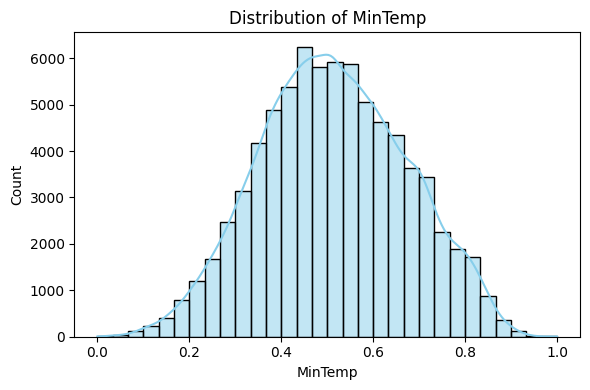

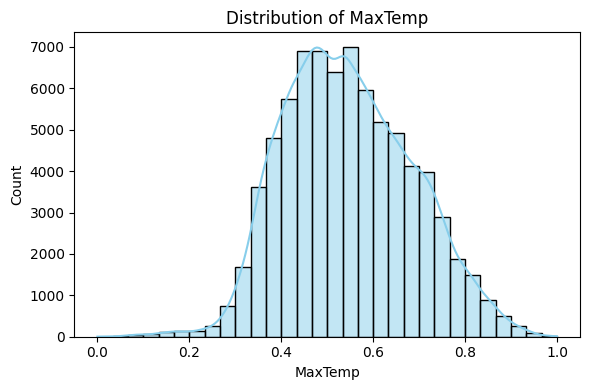

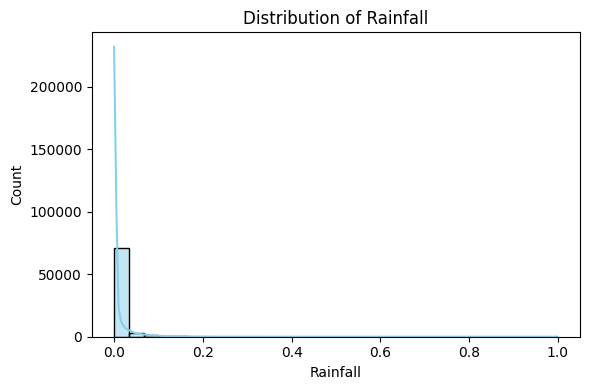

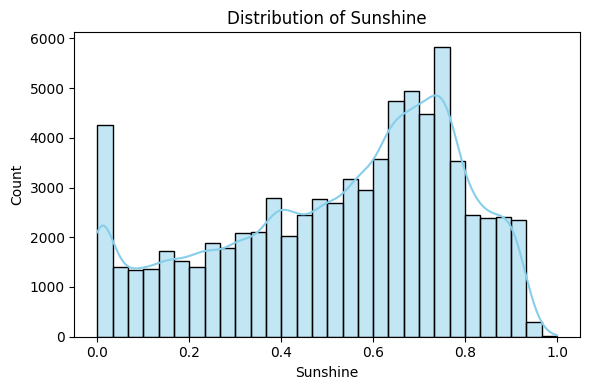

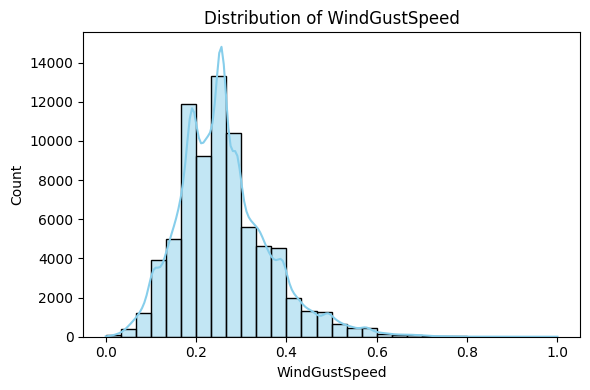

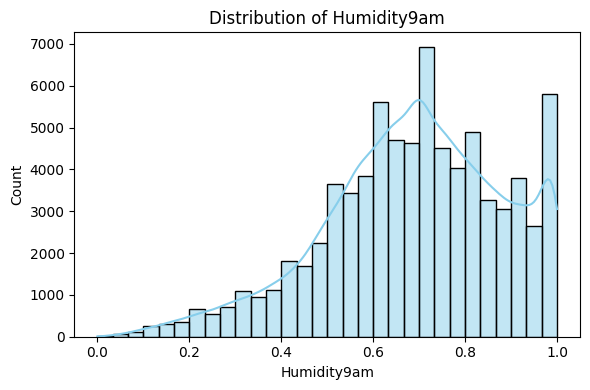

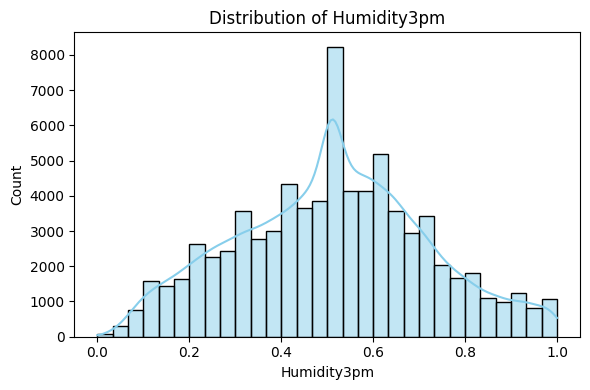

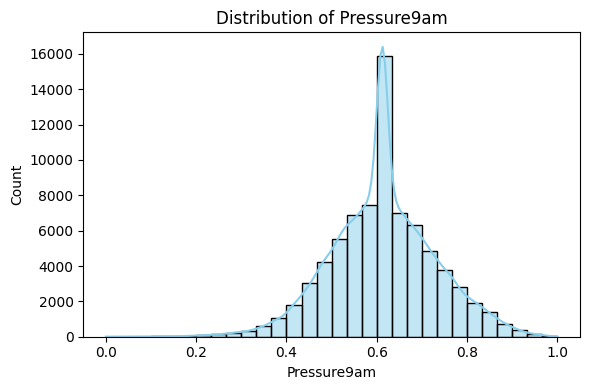

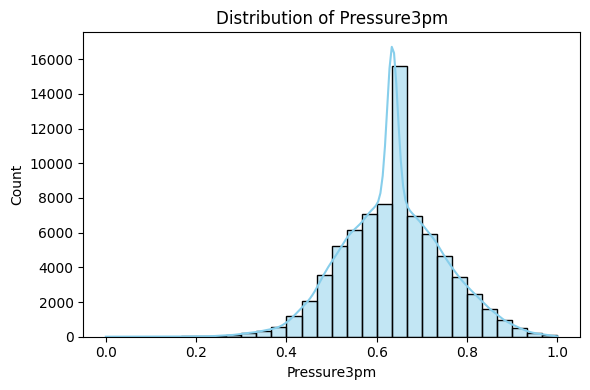

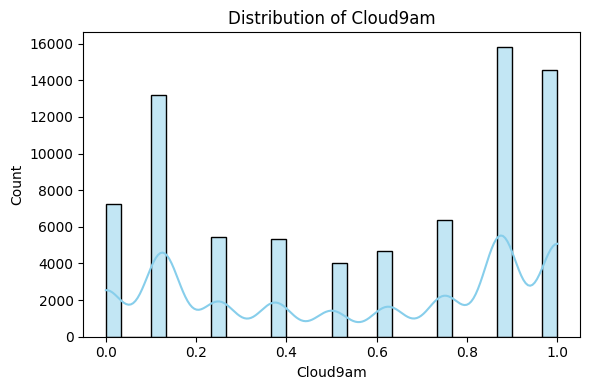

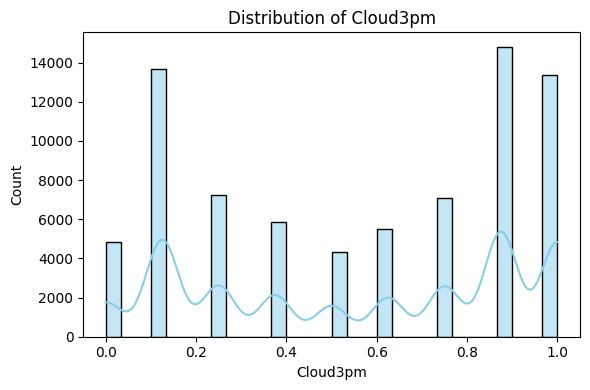

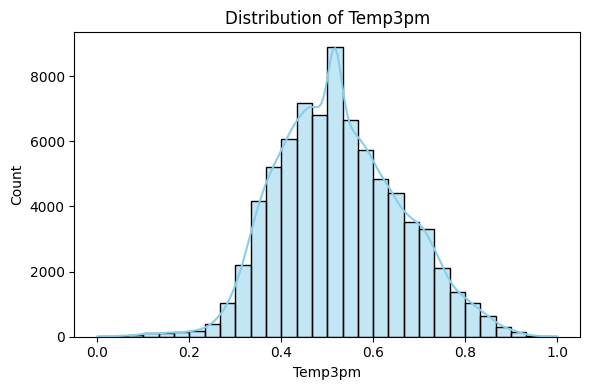

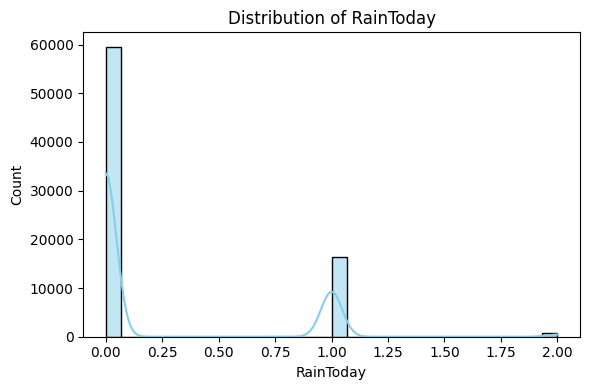

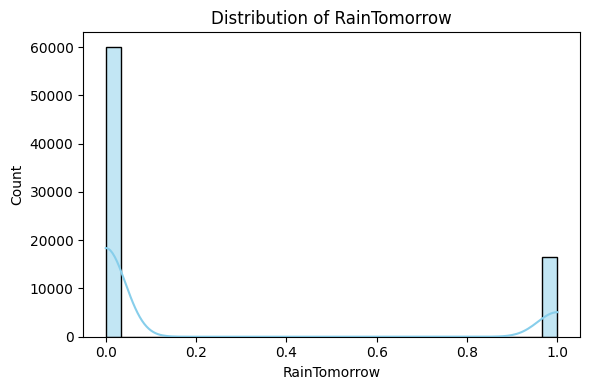

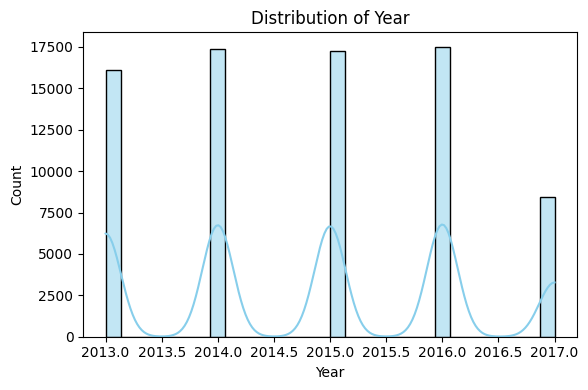

C:\Users\User\AppData\Local\Temp\ipykernel_25804\3070584370.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


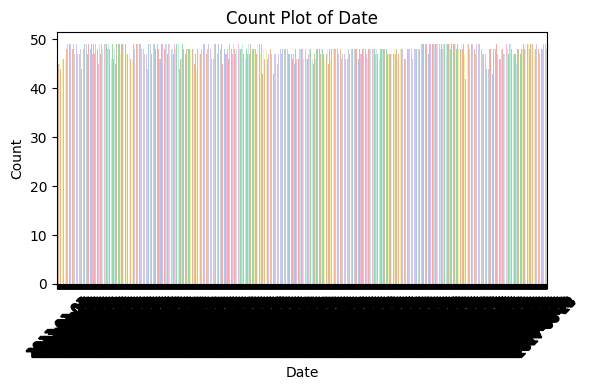

In [ ]:
#Plotting the data columns

#Seperating numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns

#Plotting numerical columns with histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

#Plotting categorical columns with count plots
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [10]:
#counting null cells in each column
df = df.dropna()
print(df.isnull().sum())


print("Total empty cells:", df.isnull().sum().sum())

#calculating missing data percentage for each columm 
missing_percent = df.isnull().mean() * 100
print()

# print("Percentage of missing data in each column:\n")
#printing missing data percentage for each columm 
# print(missing_percent.sort_values(ascending=False))

Date             0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
dtype: int64
Total empty cells: 0



In [11]:
#Decision Tree Model

from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])


train_df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2015)]
test_df  = df[(df['Date'].dt.year >= 2016) & (df['Date'].dt.year <= 2017)]


train_df = train_df.drop('Date', axis=1)
test_df = test_df.drop('Date', axis=1)


label_encoders = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])
        label_encoders[col] = le


X_train = train_df.drop('RainTomorrow', axis=1)
y_train = train_df['RainTomorrow']
X_test = test_df.drop('RainTomorrow', axis=1)
y_test = test_df['RainTomorrow']


smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_balanced, y_train_balanced)


y_pred = dt_classifier.predict(X_test)


dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_depth = dt_classifier.get_depth()

# Optional: Print results
print(f"Accuracy: {dt_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Tree Depth: {dt_depth}")


C:\Users\User\AppData\Local\Temp\ipykernel_7964\4239552566.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


Accuracy: 73.94%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     20028
           1       0.45      0.58      0.50      5946

    accuracy                           0.74     25974
   macro avg       0.65      0.68      0.66     25974
weighted avg       0.77      0.74      0.75     25974

Tree Depth: 36


In [ ]:
#Random Forest

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

df = pd.read_csv("processed_weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

train_df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2015)]
test_df  = df[(df['Date'].dt.year >= 2016) & (df['Date'].dt.year <= 2017)]

train_df = train_df.drop('Date', axis=1)
test_df = test_df.drop('Date', axis=1)

# label_encoders = {}
# for col in train_df.columns:
#     if train_df[col].dtype == 'object':
#         le = LabelEncoder()
#         train_df[col] = le.fit_transform(train_df[col])
#         test_df[col] = le.transform(test_df[col])
#         label_encoders[col] = le

X_train = train_df.drop('RainTomorrow', axis=1)
y_train = train_df['RainTomorrow']
X_test = test_df.drop('RainTomorrow', axis=1)
y_test = test_df['RainTomorrow']

X_train = X_train.fillna(X_train.median())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_balanced, y_train_balanced)

y_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 81.65%

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88     20028
           1       0.59      0.63      0.61      5946

    accuracy                           0.82     25974
   macro avg       0.74      0.75      0.75     25974
weighted avg       0.82      0.82      0.82     25974



In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import pandas as pd

df = pd.read_csv("processed_weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

train_df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2015)]
test_df  = df[(df['Date'].dt.year >= 2016) & (df['Date'].dt.year <= 2017)]

train_df = train_df.drop('Date', axis=1)
test_df = test_df.drop('Date', axis=1)

label_encoders = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])
        label_encoders[col] = le

X_train = train_df.drop('RainTomorrow', axis=1)
y_train = train_df['RainTomorrow']
X_test = test_df.drop('RainTomorrow', axis=1)
y_test = test_df['RainTomorrow']

X_train = X_train.fillna(X_train.median())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(X_train_scaled, y_train_balanced)

y_pred = knn_classifier.predict(X_test_scaled)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)
knn_conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 70.56%

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78     20028
           1       0.42      0.75      0.54      5946

    accuracy                           0.71     25974
   macro avg       0.66      0.72      0.66     25974
weighted avg       0.79      0.71      0.73     25974



In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

df = pd.read_csv("processed_weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

train_df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2015)]
test_df  = df[(df['Date'].dt.year >= 2016) & (df['Date'].dt.year <= 2017)]

train_df = train_df.drop('Date', axis=1)
test_df = test_df.drop('Date', axis=1)

label_encoders = {}
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        le = LabelEncoder()
        train_df[col] = le.fit_transform(train_df[col])
        test_df[col] = le.transform(test_df[col])
        label_encoders[col] = le

X_train = train_df.drop('RainTomorrow', axis=1)
y_train = train_df['RainTomorrow']
X_test = test_df.drop('RainTomorrow', axis=1)
y_test = test_df['RainTomorrow']

X_train = X_train.fillna(X_train.median())

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_scaled, y_train_balanced)

y_pred = svm_classifier.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)
svm_conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 73.74%

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81     20028
           1       0.46      0.79      0.58      5946

    accuracy                           0.74     25974
   macro avg       0.69      0.76      0.69     25974
weighted avg       0.82      0.74      0.76     25974



Epoch 1/10
839/839 [==============================] - 12s 13ms/step - loss: 0.5205 - accuracy: 0.7832 - val_loss: 0.5317 - val_accuracy: 0.7664
Epoch 2/10
839/839 [==============================] - 10s 12ms/step - loss: 0.5034 - accuracy: 0.7907 - val_loss: 0.5301 - val_accuracy: 0.7663
Epoch 3/10
839/839 [==============================] - 10s 11ms/step - loss: 0.5028 - accuracy: 0.7908 - val_loss: 0.5292 - val_accuracy: 0.7664
Epoch 4/10
839/839 [==============================] - 10s 12ms/step - loss: 0.5017 - accuracy: 0.7907 - val_loss: 0.5283 - val_accuracy: 0.7663
Epoch 5/10
839/839 [==============================] - 10s 11ms/step - loss: 0.5007 - accuracy: 0.7907 - val_loss: 0.5282 - val_accuracy: 0.7662
Epoch 6/10
839/839 [==============================] - 10s 11ms/step - loss: 0.5007 - accuracy: 0.7907 - val_loss: 0.5279 - val_accuracy: 0.7662
Epoch 7/10
839/839 [==============================] - 10s 12ms/step - loss: 0.5005 - accuracy: 0.7907 - val_loss: 0.5278 - val_accuracy:

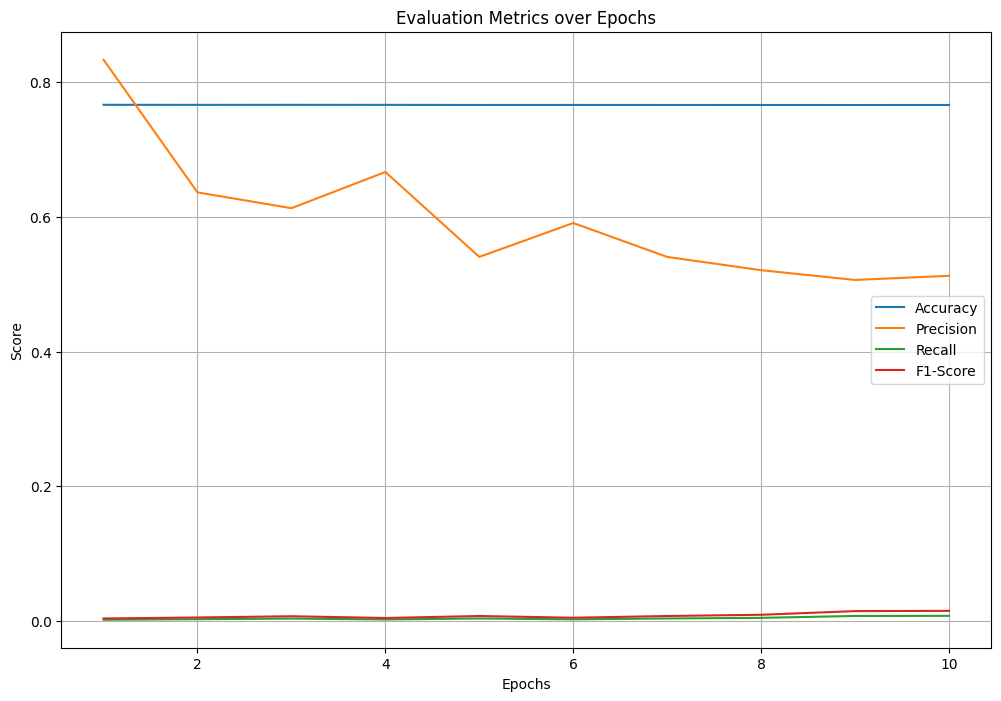

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.optimizers import Adam


df = pd.read_csv("processed_weatherAUS.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')


df = df[(df['Date'].dt.year >= 2013) & (df['Date'].dt.year <= 2017)]
df = df.drop('Date', axis=1)


for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])


df['RainTomorrow'] = (df['RainTomorrow'] > 0).astype(int)


X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.nan_to_num(X_scaled)


def create_sequences(X, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y.values)


split_index = int(len(X_seq) * 0.7)
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]


class MetricsCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.history = {
            "Accuracy": [],
            "Precision": [],
            "Recall": [],
            "F1-Score": []
        }

    def on_epoch_end(self, epoch, logs=None):
        y_pred_prob = self.model.predict(self.X_val, verbose=0)
        y_pred = (y_pred_prob > 0.5).astype(int)

        acc = accuracy_score(self.y_val, y_pred)
        prec = precision_score(self.y_val, y_pred)
        rec = recall_score(self.y_val, y_pred)
        f1 = f1_score(self.y_val, y_pred)

        self.history["Accuracy"].append(acc)
        self.history["Precision"].append(prec)
        self.history["Recall"].append(rec)
        self.history["F1-Score"].append(f1)


model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
metrics_callback = MetricsCallback(X_test, y_test)


history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10,
                    batch_size=64,
                    callbacks=[early_stop, metrics_callback],
                    verbose=1)


y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1 = f1_score(y_test, y_pred)

print(f"\n✅ Final Test Accuracy: {lstm_accuracy * 100:.2f}%")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall:    {lstm_recall:.4f}")
print(f"F1-Score:  {lstm_f1:.4f}")


lstm_metrics_over_epochs = metrics_callback.history


epochs = range(1, len(metrics_callback.history["Accuracy"]) + 1)

plt.figure(figsize=(12, 8))

plt.plot(epochs, metrics_callback.history["Accuracy"], label='Accuracy')
plt.plot(epochs, metrics_callback.history["Precision"], label='Precision')
plt.plot(epochs, metrics_callback.history["Recall"], label='Recall')
plt.plot(epochs, metrics_callback.history["F1-Score"], label='F1-Score')

plt.title('Evaluation Metrics over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


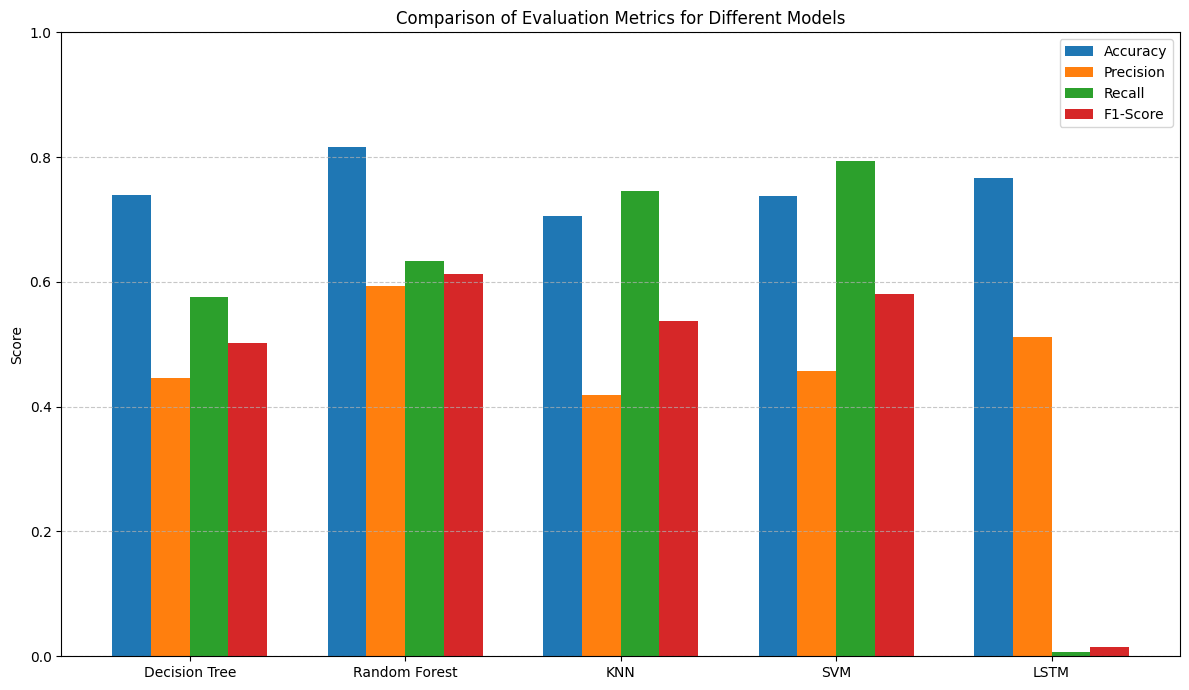

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = {
    'Decision Tree': {
        'Accuracy': dt_accuracy,
        'Precision': dt_precision,
        'Recall': dt_recall,
        'F1-Score': dt_f1,
    },
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1-Score': rf_f1,
    },
    'KNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-Score': knn_f1,
    },
    'SVM': {
        'Accuracy': svm_accuracy,
        'Precision': svm_precision,
        'Recall': svm_recall,
        'F1-Score': svm_f1,
    },
    'LSTM': {
        'Accuracy': lstm_metrics_over_epochs["Accuracy"][-1],
        'Precision': lstm_metrics_over_epochs["Precision"][-1],
        'Recall': lstm_metrics_over_epochs["Recall"][-1],
        'F1-Score': lstm_metrics_over_epochs["F1-Score"][-1],
    }
}

models = list(metrics.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']


num_models = len(models)
num_metrics = len(metric_names)
bar_width = 0.18


indices = np.arange(num_models)

plt.figure(figsize=(12, 7))


for i, metric in enumerate(metric_names):
    values = [metrics[model][metric] for model in models]
    plt.bar(indices + i * bar_width, values, width=bar_width, label=metric)


plt.xticks(indices + bar_width * (num_metrics-1) / 2, models)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
